# **Project Assigned by VEZOW**

# ***“Classification of census income data for Pakistan”.***


### **Import all Librareis**

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
 
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix


### **Data Exploration**

**Listing of attributes:**

**salary:** >50K, <=50K

**age:** continuous 

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked 

**fnlwgt:** continuous 

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool 

**education-num:** continuous 

**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse 

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces 

**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried 

**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black 

**sex:** Female, Male 

**capital-gain:** continuous 

**capital-loss:** continuous 

**hours-per-week:** continuous 

**native-country:** Pakistan, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [76]:
census = pd.read_csv('census-pk.csv')
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_above_50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,Pakistan,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,Pakistan,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,Pakistan,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,Pakistan,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,Pakistan,<=50K,0


In [113]:
census = census[census['native-country']=="Pakistan"]

### **Exploratory Data Analysis**

In [114]:
census.shape

(43832, 16)

In [115]:
census['income_above_50K']=census['income'].map({'<=50K':0, '>50K':1})

In [116]:
# finding special characters in the dataset
census.isin(['?']).sum(axis=0)

age                    0
workclass           2530
fnlwgt                 0
education              0
education-num          0
marital-status         0
occupation          2540
relationship           0
race                   0
sex                    0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country         0
income                 0
income_above_50K       0
dtype: int64

There are 15 variables in the dataset- 14 independent and 1 dependant, i.e target variable- income

It is obsereved that dataset contains missing values that are marked with a question mark character (?).

In [117]:
census.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
income_above_50K    0
dtype: int64

In [118]:
census.shape

(43832, 16)

In [119]:
census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_above_50K'],
      dtype='object')

In [120]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43832 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               43832 non-null  int64 
 1   workclass         43832 non-null  object
 2   fnlwgt            43832 non-null  int64 
 3   education         43832 non-null  object
 4   education-num     43832 non-null  int64 
 5   marital-status    43832 non-null  object
 6   occupation        43832 non-null  object
 7   relationship      43832 non-null  object
 8   race              43832 non-null  object
 9   sex               43832 non-null  object
 10  capital-gain      43832 non-null  int64 
 11  capital-loss      43832 non-null  int64 
 12  hours-per-week    43832 non-null  int64 
 13  native-country    43832 non-null  object
 14  income            43832 non-null  object
 15  income_above_50K  43832 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 5.7+ MB


In [121]:
census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_above_50K
count,43832.000000,4.383200e+04,43832.000000,43832.000000,43832.000000,43832.000000,43832.000000
mean,38.698690,1.871419e+05,10.168667,1089.626529,88.789743,40.440774,0.243977
std,13.795294,1.051913e+05,2.393353,7455.791326,405.539243,12.471352,0.429484
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.156770e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.766720e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.344772e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [122]:
#statistical sumaary -categorical features
census.describe(include=object)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,43832,43832,43832,43832,43832,43832,43832,43832,43832
unique,9,16,7,15,6,5,2,1,2
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,Pakistan,<=50K
freq,30145,14570,20003,5606,17733,38493,29223,43832,33138


### **Data Visualization**

In [123]:
sns.set()
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


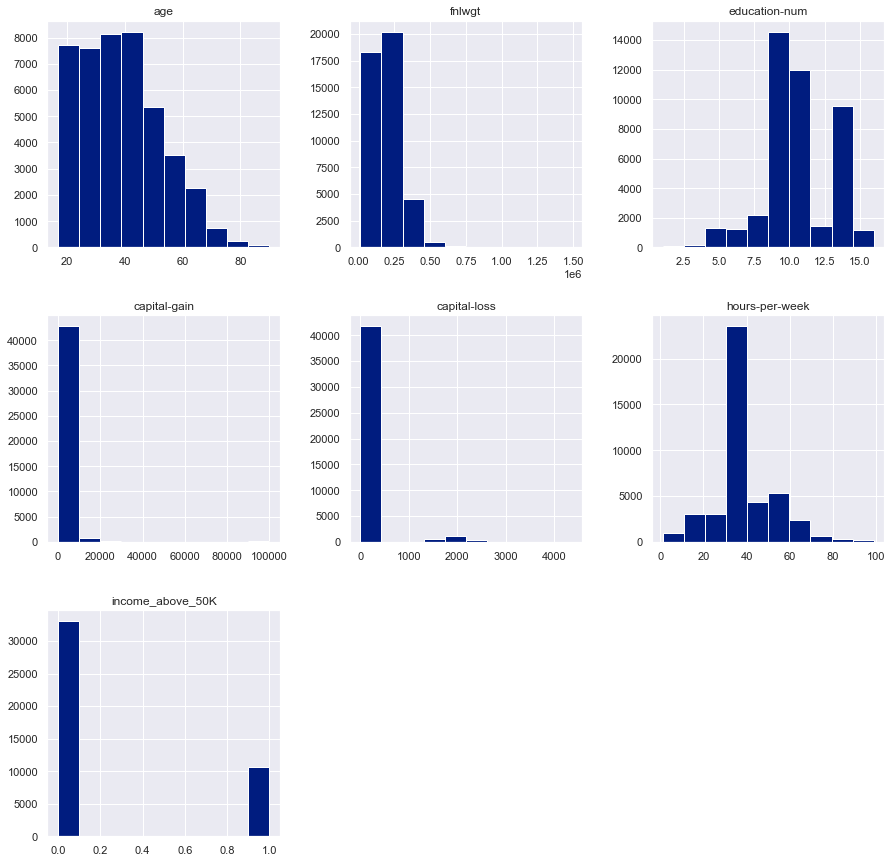

In [124]:
# Histogram for numeric values 
plt.style.use("seaborn-dark-palette")
census[census._get_numeric_data().columns].hist(figsize = (15,15))
plt.show()

c:\Users\Lenovo\anaconda3\envs\streamlit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\Lenovo\anaconda3\envs\streamlit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\Lenovo\anaconda3\envs\streamlit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\Lenovo\anaconda3\en

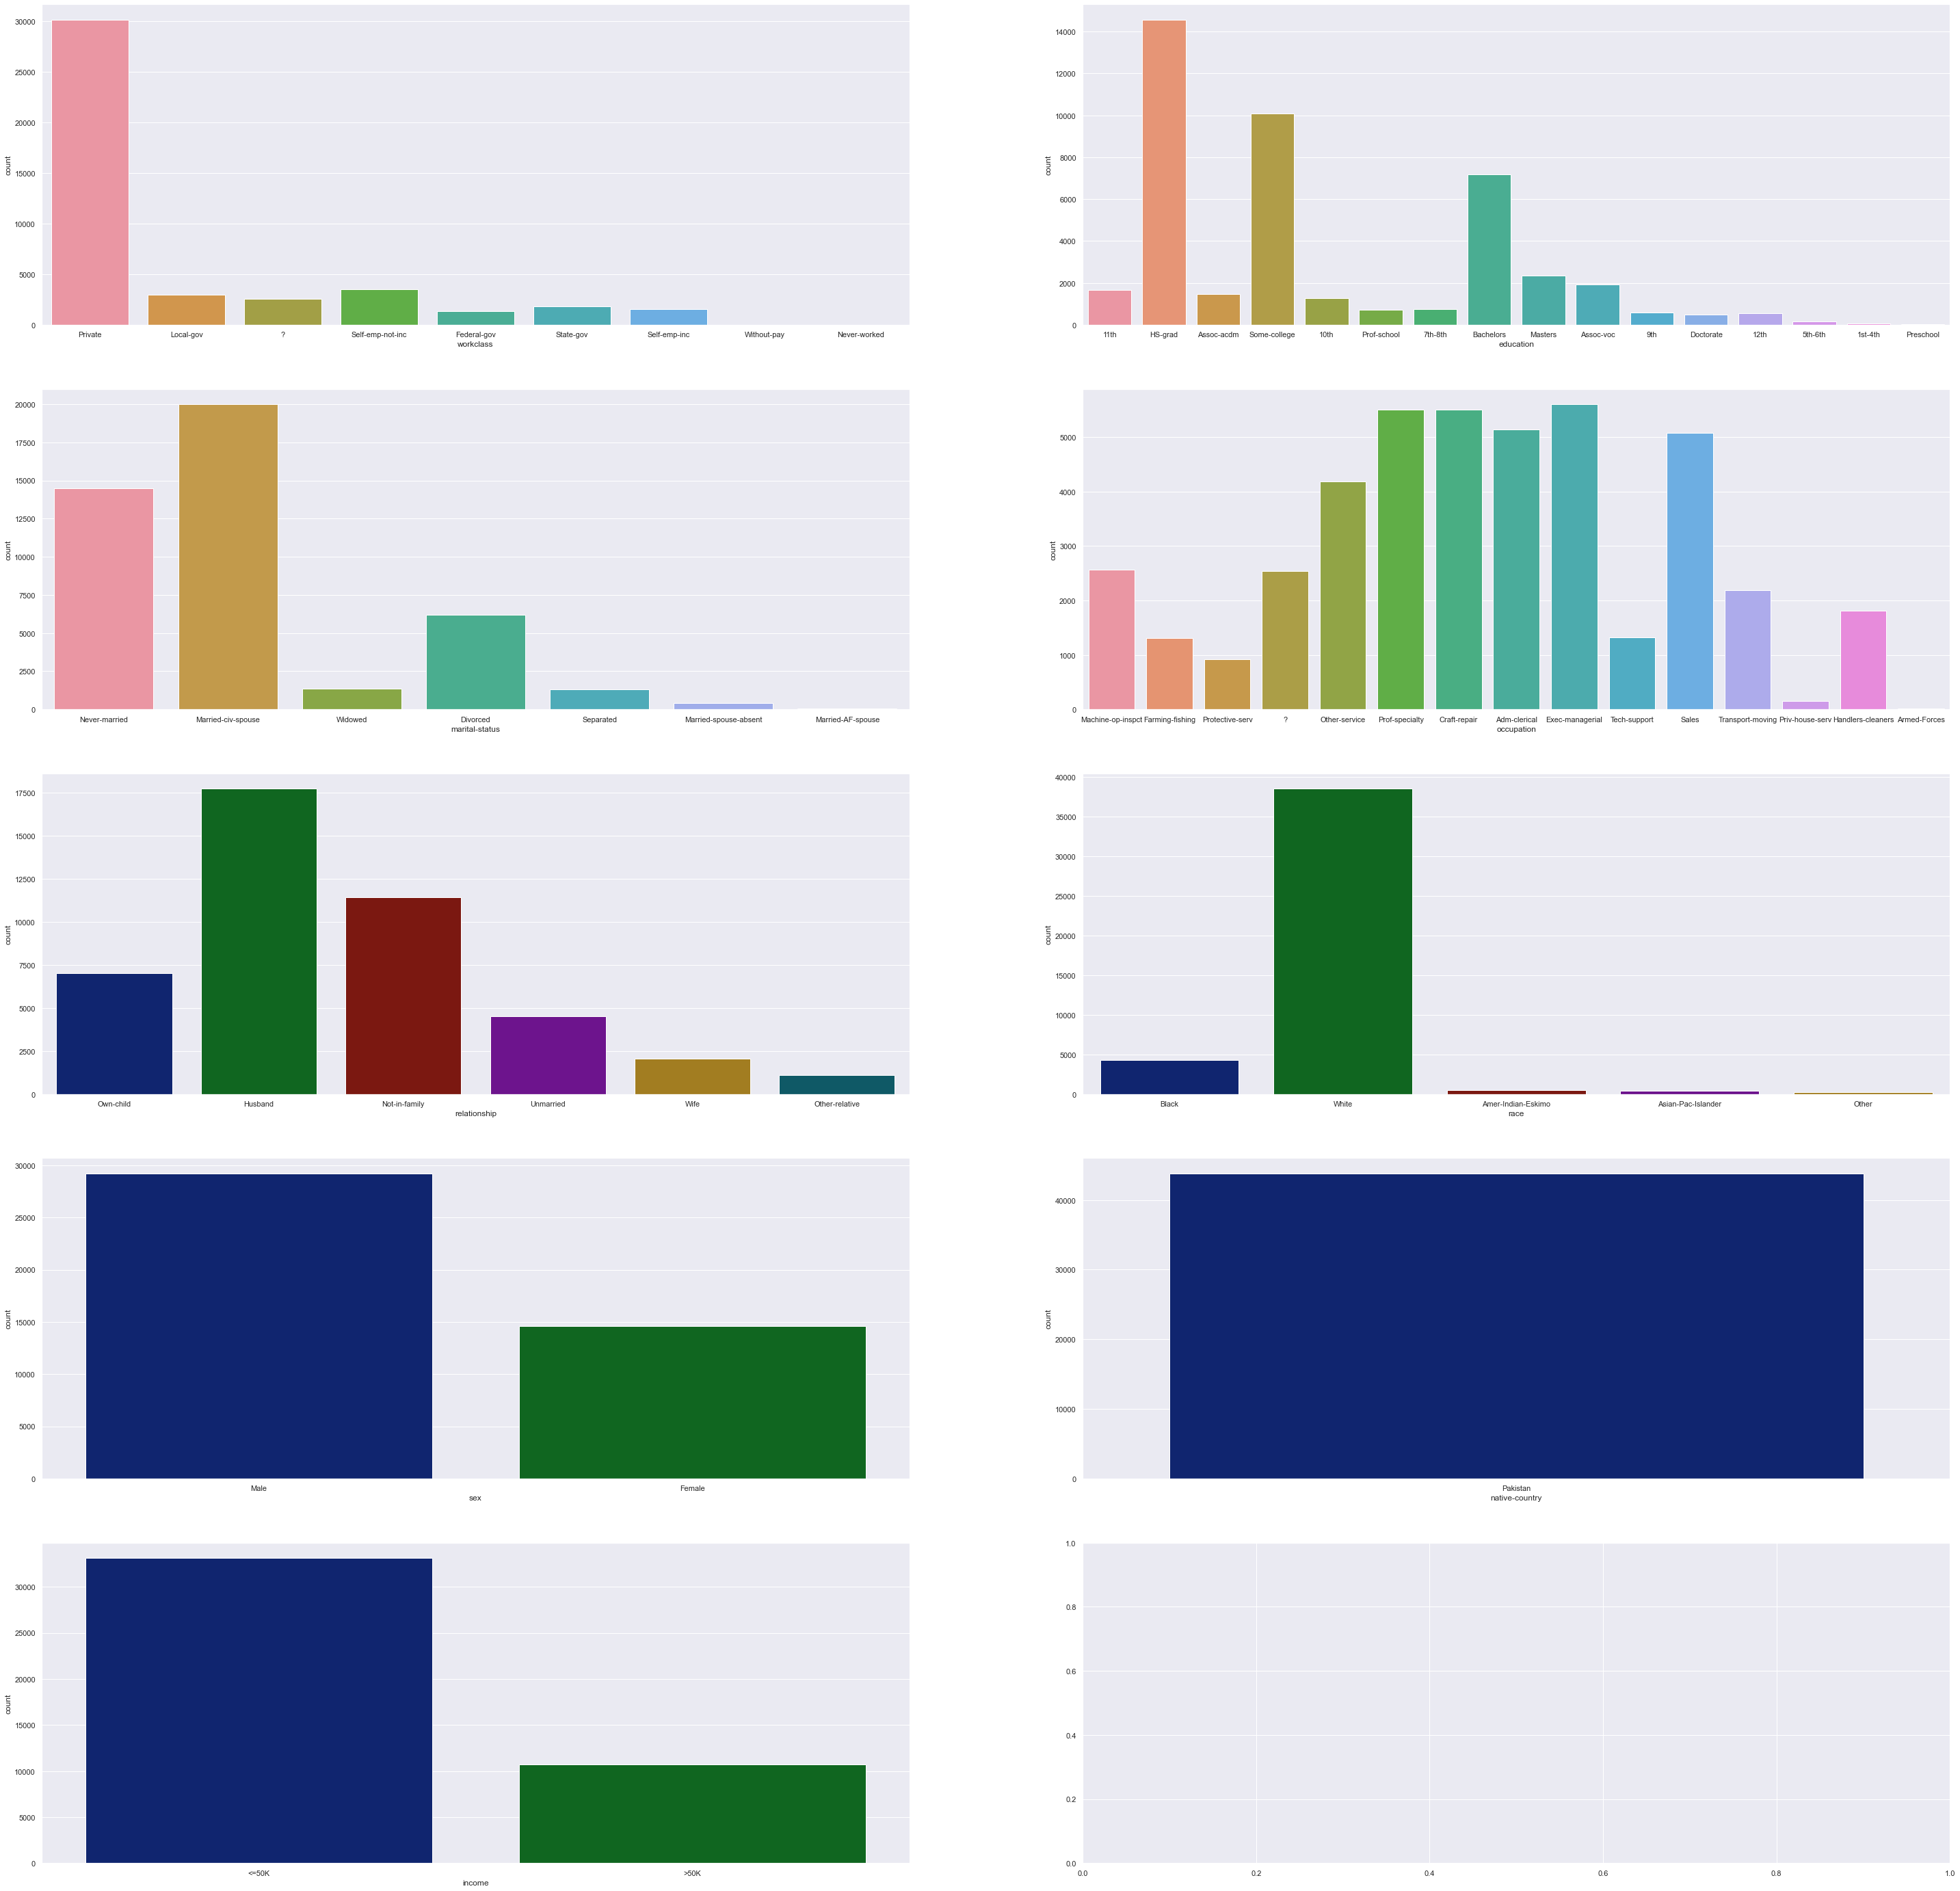

In [125]:
# count plot for categorical features
cat_fea = census.select_dtypes(include=['object']).columns
fig, ax = plt.subplots(nrows=5, ncols=2, figsize = (50, 50))
for variable, subplot in zip(census[cat_fea], ax.flatten()):
  sns.countplot(census[variable],ax = subplot)
plt.show()

In [126]:
census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_above_50K'],
      dtype='object')

In [92]:
s=census.income
counts=s.value_counts()
percentage= s.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
pd.DataFrame({"Count": counts, "%": percentage })

,Count,%
<=50K,37155,76.07%
>50K,11687,23.93%


        Count       %
Male    32650  66.85%
Female  16192  33.15%


Text(0.5, 1.0, 'Gender distribution')

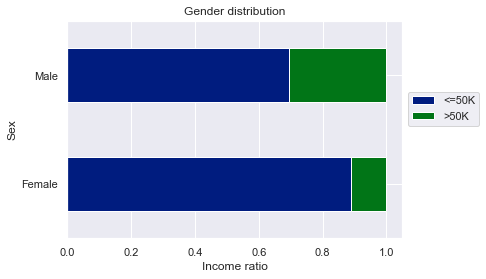

In [94]:
# Gender ratio
t=census.sex
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = census.groupby(['sex', 'income']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Sex')
plt.xlabel('Income ratio')
plt.title("Gender distribution")

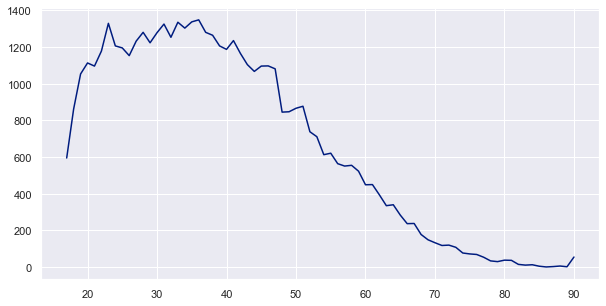

In [99]:
# Age distribution in the datset
plt.figure(figsize=(10,5))
census['age'].value_counts().sort_index().plot.line()
plt.show()

In [103]:
# Getting average working hour per country with income
pd.crosstab(census['native-country'], census['income'], 
           values=census['hours-per-week'], aggfunc=np.mean)

income,<=50K,>50K
native-country,,
?,39.552590,45.318182
Cambodia,41.157895,43.888889
Canada,37.378151,46.126984
China,36.686047,42.027778
Columbia,39.123457,56.250000
Cuba,39.201923,42.852941
Dominican-Republic,41.561224,42.800000
Ecuador,37.948718,47.833333
El-Salvador,35.819444,43.454545


c:\Users\Lenovo\anaconda3\envs\streamlit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'input data numbers')

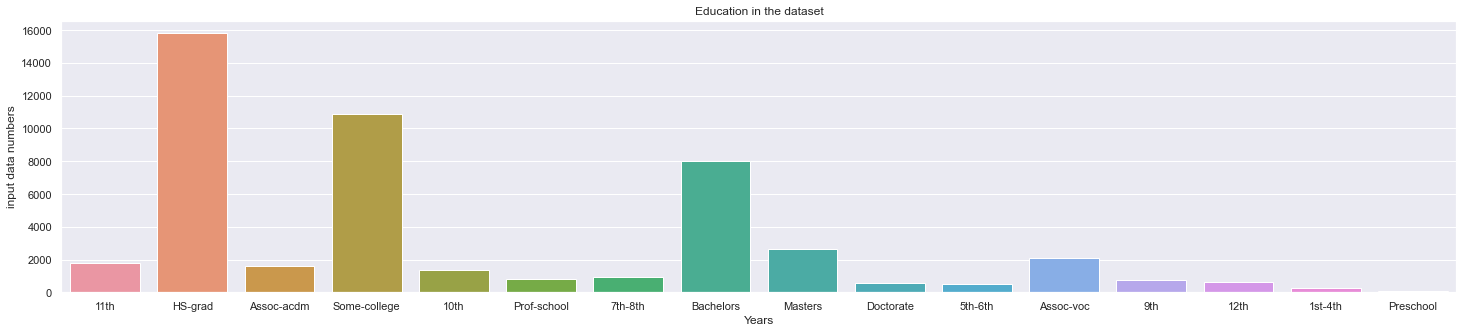

In [105]:
#education
plt.figure(figsize=(25, 5))
sns.countplot(census['education'])
plt.title('Education in the dataset')
plt.xlabel('Years')
plt.ylabel('input data numbers')

Text(0.5, 1.0, 'Education distribution')

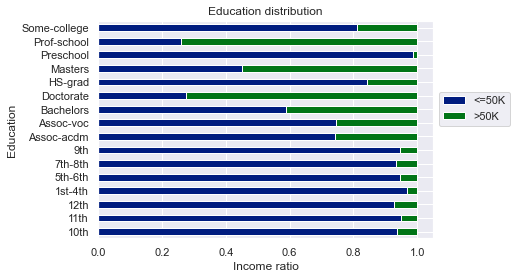

In [109]:
#eductaion distribution; 
edu_group = census.groupby(['education', 'income']).size().unstack()
edu_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False) # apply(lambda x:x/x.sum(), axis=1) is used to get percentage Bar plots
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Education')
plt.xlabel('Income ratio')
plt.title("Education distribution")

It is observed that

1) In the datatset we have large number of highschool graduates.

2) People with higher education- Doctorate, Masters and those studied at professional schools tend to earn more than other cateogory

Text(0.5, 1.0, 'Workclass distribution')

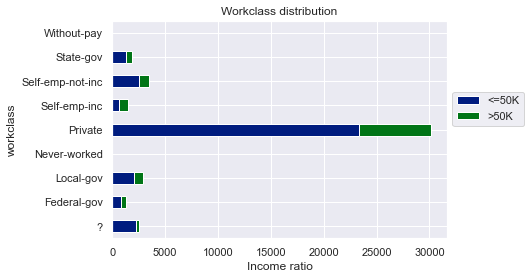

In [129]:
# Workclass distribution; workclass vs income
wrkcls = census.groupby(['workclass', 'income']).size().unstack()
wrkcls.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('workclass')
plt.xlabel('Income ratio')
plt.title("Workclass distribution")

Text(0.5, 1.0, 'Occupation distribution')

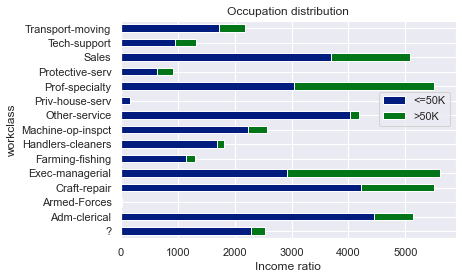

In [130]:
# occupation vs income
occu = census.groupby(['occupation', 'income']).size().unstack()
occu.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('workclass')
plt.xlabel('Income ratio')
plt.title("Occupation distribution")

Text(0.5, 1.0, 'Race distribution')

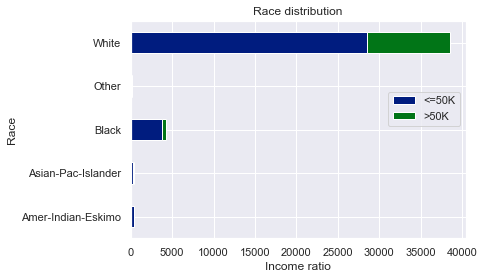

In [131]:
# race distribution; race vs income
race = census.groupby(['race', 'income']).size().unstack()
race.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Race')
plt.xlabel('Income ratio')
plt.title("Race distribution")

Text(0.5, 1.0, 'Relationship')

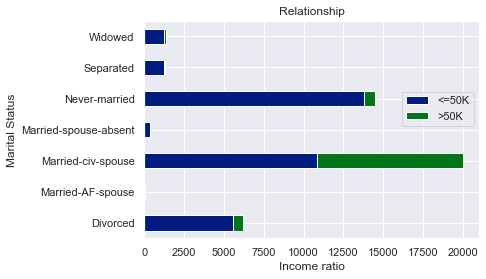

In [132]:
# marital status
marital = census.groupby(['marital-status', 'income']).size().unstack()
marital.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Marital Status')
plt.xlabel('Income ratio')
plt.title("Relationship")

In [133]:
#married male with higher income
census.loc[(census['sex'] == 'Male') &
     (census['marital-status'].str.startswith('Married')), 'income'].value_counts()

<=50K    9875
>50K     8171
Name: income, dtype: int64

In [134]:
#married female with higher income
census.loc[(census['sex'] == 'Female') &
     (census['marital-status'].str.startswith('Married')), 'income'].value_counts()

<=50K    1362
>50K     1024
Name: income, dtype: int64

### **Data preprocessing**

In [136]:
census.columns
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_above_50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,Pakistan,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,Pakistan,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,Pakistan,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,Pakistan,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,Pakistan,<=50K,0


In [138]:
census.drop(['income', 'native-country'], axis=1, inplace=True)

In [140]:
census["workclass"] = LabelEncoder().fit_transform(census["workclass"])
census["education"] = LabelEncoder().fit_transform(census["education"])
census["marital-status"] = LabelEncoder().fit_transform(census["marital-status"])
census["occupation"] = LabelEncoder().fit_transform(census["occupation"])
census["relationship"] = LabelEncoder().fit_transform(census["relationship"])
census["race"] = LabelEncoder().fit_transform(census["race"])
census["sex"] = LabelEncoder().fit_transform(census["sex"])
census["native-country"] = LabelEncoder().fit_transform(census["native-country"])


In [141]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_above_50K
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,0,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,0,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,0,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,0,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,0,0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,0
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,0
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,0
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,0


In [144]:
census.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_above_50K
age,1.000000,0.015848,-0.071165,-0.014462,0.029673,-0.264629,-0.015978,-0.271731,0.028199,0.095876,0.076747,0.057151,0.073144,NaN,0.231683
workclass,0.015848,1.000000,-0.017677,0.019874,0.059093,-0.068956,0.255653,-0.090874,0.070016,0.089503,0.038356,0.011522,0.140814,NaN,0.052709
fnlwgt,-0.071165,-0.017677,1.000000,-0.008029,-0.009346,0.027241,0.001608,0.014352,-0.050994,0.018891,-0.000002,-0.003477,-0.014617,NaN,0.003680
education,-0.014462,0.019874,-0.008029,1.000000,0.321406,-0.033971,-0.022948,-0.011237,0.024644,-0.026013,0.025867,0.013941,0.059895,NaN,0.069165
education-num,0.029673,0.059093,-0.009346,0.321406,1.000000,-0.062946,0.114925,-0.095648,0.083151,0.011427,0.130867,0.081666,0.157187,NaN,0.333893
marital-status,-0.264629,-0.068956,0.027241,-0.033971,-0.062946,1.000000,-0.018426,0.183113,-0.079149,-0.125723,-0.043397,-0.033406,-0.190288,NaN,-0.195787
occupation,-0.015978,0.255653,0.001608,-0.022948,0.114925,-0.018426,1.000000,-0.080200,0.013973,0.078728,0.024441,0.017306,0.081462,NaN,0.075674
relationship,-0.271731,-0.090874,0.014352,-0.011237,-0.095648,0.183113,-0.080200,1.000000,-0.138749,-0.576895,-0.057299,-0.057536,-0.257607,NaN,-0.258199
race,0.028199,0.070016,-0.050994,0.024644,0.083151,-0.079149,0.013973,-0.138749,1.000000,0.105114,0.022877,0.028875,0.047770,NaN,0.090171
sex,0.095876,0.089503,0.018891,-0.026013,0.011427,-0.125723,0.078728,-0.576895,0.105114,1.000000,0.047443,0.045958,0.234602,NaN,0.219888


<AxesSubplot:>

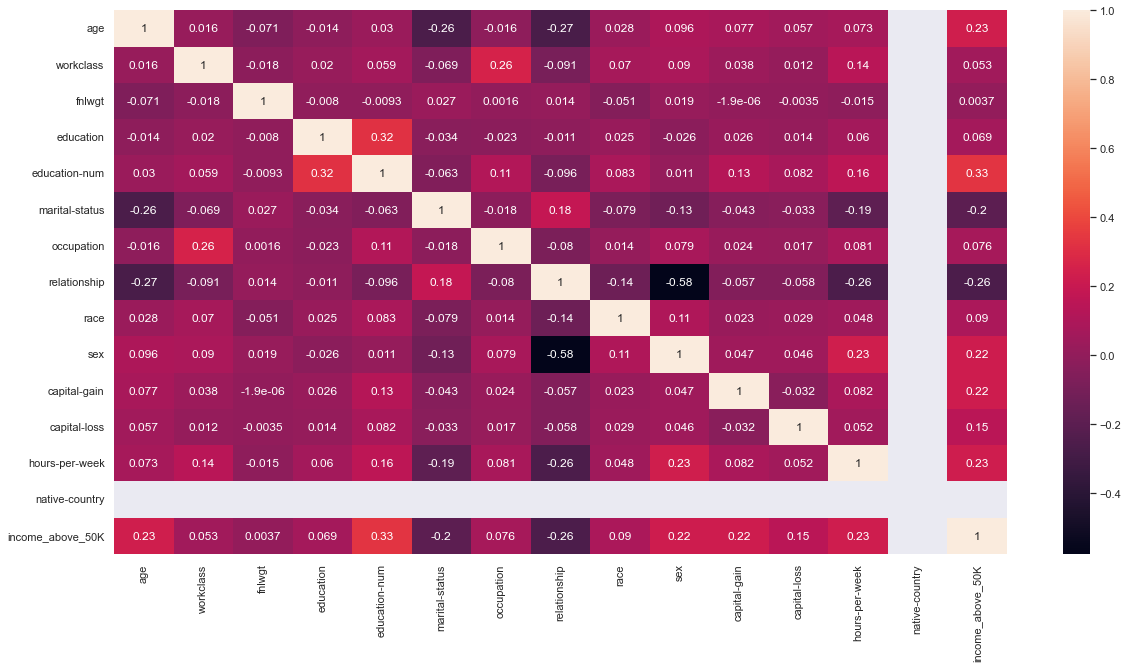

In [147]:
plt.figure(figsize=(20,10))
sns.heatmap(census.corr(), annot=True)

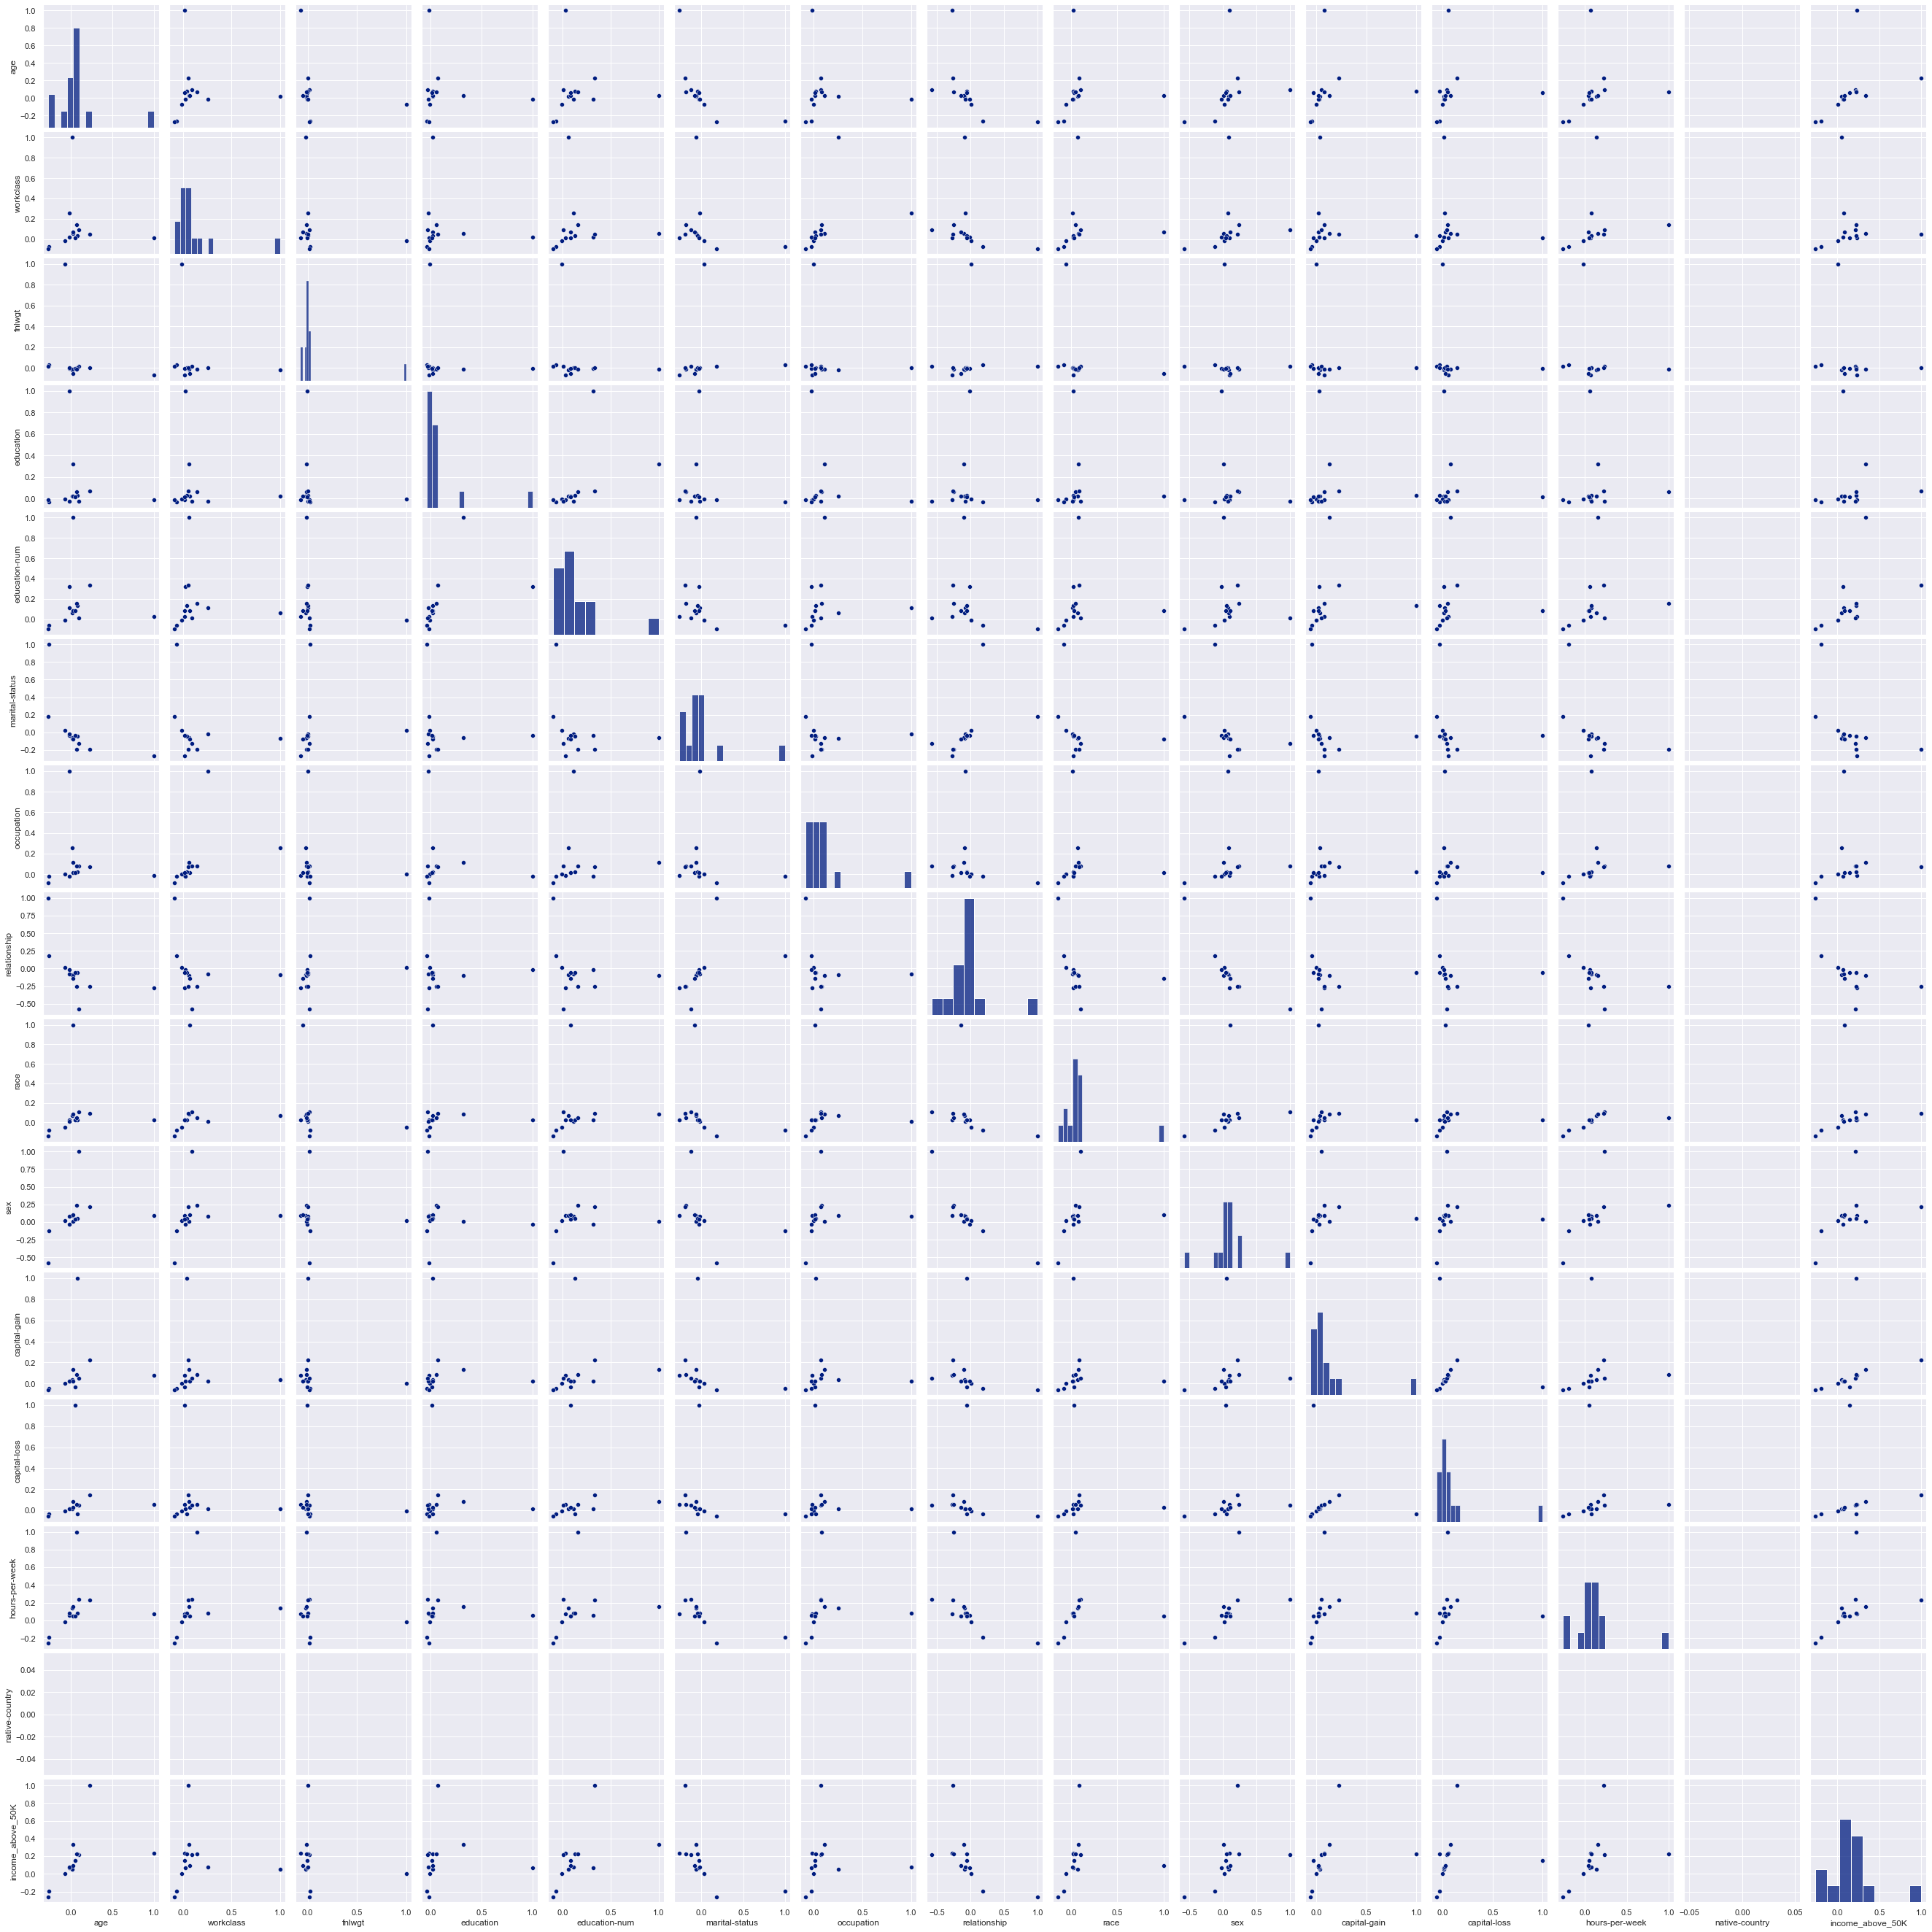

In [148]:
sns.pairplot(census.corr())

In [149]:
x = census.iloc[:, :-1]
y = census.iloc[:, -1]
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,0
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,0
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,0
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,0


In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(y_train.shape)


(35065, 14)
(35065,)
(35065,)


## **ML for  Classification**

### **Logistic Regression**

In [157]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_pred, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred, y_test)) 
print('Classification Report', classification_report(y_test,y_pred))

Accuracy Score:  0.7914908178396258
Confusion Matrix:  [[6367 1614]
 [ 214  572]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.97      0.87      6581
           1       0.73      0.26      0.38      2186

    accuracy                           0.79      8767
   macro avg       0.76      0.61      0.63      8767
weighted avg       0.78      0.79      0.75      8767



<AxesSubplot:>

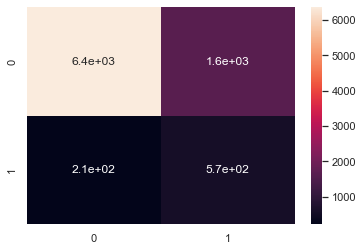

In [158]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

### **Support Vector Machine**

In [159]:
model1 = SVC()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_pred, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred, y_test)) 
print('Classification Report', classification_report(y_test,y_pred))

Accuracy Score:  0.7884110870309113
Confusion Matrix:  [[6571 1845]
 [  10  341]]
Classification Report               precision    recall  f1-score   support

           0       0.78      1.00      0.88      6581
           1       0.97      0.16      0.27      2186

    accuracy                           0.79      8767
   macro avg       0.88      0.58      0.57      8767
weighted avg       0.83      0.79      0.72      8767



<AxesSubplot:>

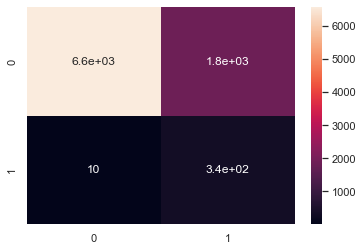

In [160]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

### **K-Nearest Neighbors**

In [161]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_pred, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred, y_test)) 
print('Classification Report', classification_report(y_test,y_pred))

c:\Users\Lenovo\anaconda3\envs\streamlit\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Accuracy Score:  0.7731264970913654
Confusion Matrix:  [[6032 1440]
 [ 549  746]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.92      0.86      6581
           1       0.58      0.34      0.43      2186

    accuracy                           0.77      8767
   macro avg       0.69      0.63      0.64      8767
weighted avg       0.75      0.77      0.75      8767



<AxesSubplot:>

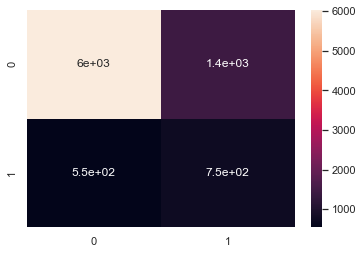

In [162]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

### **MLP Classifier**

In [164]:
model3 = MLPClassifier(max_iter=100, alpha = 0.001, random_state=0)
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_pred, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred, y_test)) 
print('Classification Report', classification_report(y_test,y_pred))

Accuracy Score:  0.7902361126953348
Confusion Matrix:  [[6503 1761]
 [  78  425]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.99      0.88      6581
           1       0.84      0.19      0.32      2186

    accuracy                           0.79      8767
   macro avg       0.82      0.59      0.60      8767
weighted avg       0.80      0.79      0.74      8767



<AxesSubplot:>

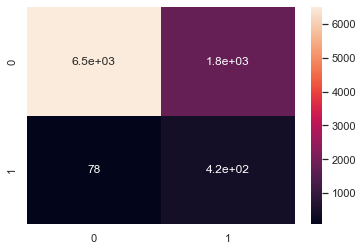

In [165]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

### **Random Forest**

In [166]:
model4 = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_pred, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred, y_test)) 
print('Classification Report', classification_report(y_test,y_pred))

Accuracy Score:  0.8485228698528573
Confusion Matrix:  [[6329 1076]
 [ 252 1110]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.96      0.91      6581
           1       0.81      0.51      0.63      2186

    accuracy                           0.85      8767
   macro avg       0.83      0.73      0.77      8767
weighted avg       0.84      0.85      0.84      8767



<AxesSubplot:>

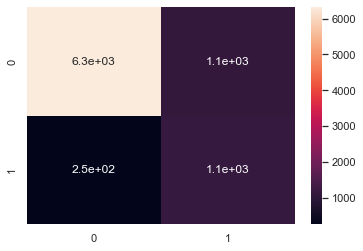

In [167]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

## **Conclusion: RandomForest Provide Best resutls according to my obervations & this Data.**